# 🍄 Mushroom Prediction with Gradio

Import the necessary libraries.

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn  as sns
import pickle

Install and import Gradio.

In [ ]:
# Install gradio
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 42.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 9.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.2/318.2 kB 29.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.1/141.1 kB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 45.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 5.6 MB/s e

In [ ]:
# Import Gradio
import gradio as gr

We will use the dataset Mushrooms from [here](https://www.kaggle.com/datasets/uciml/mushroom-classification).

In [ ]:
# Load dataset
dataset = pd.read_csv('/content/mushrooms.csv')

In [ ]:
dataset.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

The dataset contains 22 object columns.

Check for duplicates.

In [ ]:
dataset.duplicated().sum()

0

There aren't any duplicated rows.

Check for NaN values.

In [ ]:
dataset.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

There aren't any NaN values.

Get the statistical summary of the dataset.

In [ ]:
dataset.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


For better visualization, we can implement a GUI for this procedure in Gradio.

In [ ]:
# Define a function to generate summary statistics for a specified column
def summary_statistics(column_name):
    summary = dataset[column_name].describe()  # Generate descriptive statistics for the selected column
    return summary.to_dict()  # Convert the pandas Series to a dictionary and return it

# Get a list of column names from the dataset
column_names = dataset.columns.tolist()

# Set up a Gradio interface
iface = gr.Interface(
    fn=summary_statistics,  # Function to call when inputs change
    inputs=gr.Dropdown(choices=column_names, label="Column", info="Select Column"),  # Dropdown to select a column
    outputs=gr.JSON(label="Summary Statistics"),  # Output field to display summary statistics as JSON
    live=True  # Allow live updates while selecting different columns
)

# Launch the Gradio interface
iface.launch()

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://f190ccbdc4302c0c73.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


Check the shape of the dataset.

In [ ]:
dataset.shape

(8124, 23)

There are 23 columns and 8124 rows in this dataset.

We can plot individually for each column histograms like in the example below.

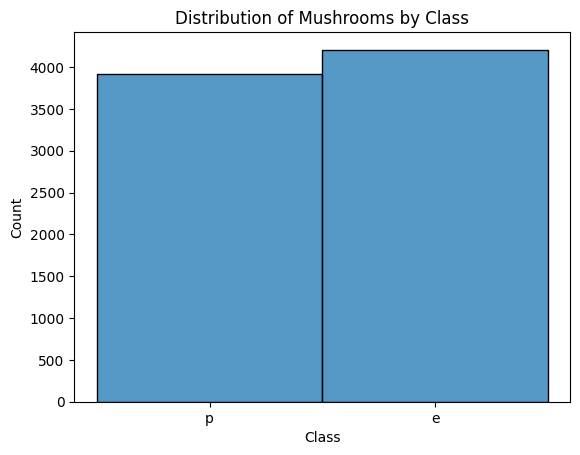

In [ ]:
sns.histplot(dataset['class'])
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Distribution of Mushrooms by Class")
plt.show()

Or we can create an interface in gradio that allows us to plot the histogram of any column.

In [ ]:
# Define a function to plot a histogram for a specified column
def plot_column(column_name):
    plt.figure(figsize=(10, 6)) # Set up the figure size
    sns.histplot(dataset[column_name], kde=False) # Plot the histogram using seaborn
    plt.title(f'Distribution of Mushrooms by {column_name}') # Set the plot title
    plt.xlabel(column_name) # Set the label for the x-axis
    plt.ylabel('Count') # Set the label for the y-axis
    plt.xticks(rotation=90) # Rotate x-axis labels for better readability
    plt.tight_layout() # Ensure the plot layout is tight
    return plt.gcf() # Return the current figure

# Get a list of column names from the dataset
column_names = dataset.columns.tolist()

# Set up a Gradio interface
iface = gr.Interface(
    fn=plot_column, # Function to call when inputs change
    inputs=gr.Dropdown(choices=column_names, label="Select Column"),  # Dropdown to select a column
    outputs=gr.Plot(), # Output field to display the plot
    live=True # Allow live updates while selecting different columns
)

# Launch the Gradio interface
iface.launch()

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://5f0b4a608046469a08.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


We can also add additional parameters as 'hue' and get new plots for multi-variate analysis.

In [ ]:
# Define a function to plot a count plot with hue
def plot_count(column1, hue_column):
    plt.figure(figsize=(12, 6)) # Set up the figure size
    sns.countplot(x=dataset[column1], hue=dataset[hue_column]) # Plot countplot using seaborn
    plt.title(f'Count Plot of {column1} with Hue {hue_column}') # Set the plot title
    plt.xticks(rotation=45) # Rotate x-axis labels for better readability
    plt.tight_layout() # Ensure the plot layout is tight
    return plt.gcf() # Return the current figure

# Get a list of column names from the dataset
column_names = dataset.columns.tolist()

# Set up a Gradio interface
iface = gr.Interface(
    fn=plot_count, # Function to call when inputs change
    inputs=[gr.Dropdown(choices=column_names, label="Column 1"), # Dropdown to select the first column
            gr.Dropdown(choices=column_names, label="Hue Column")], # Dropdown to select the hue column
    outputs=gr.Plot(), # Output field to display the plot
    live=True # Allow live updates while selecting different columns
)

# Launch the Gradio interface
iface.launch()


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://cabcd70cc66b91ec84.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


Prepare the data to fit the model.

In [ ]:
# Separate features (X) and target variable (y) from the dataset
X = dataset.drop(['class'], axis=1) # X contains all columns except 'class'
y = dataset['class'] # y contains only the 'class' column

Since we have categorical data, we will use One-Hot Encoding for X.

In [ ]:
# Convert categorical variables into dummy variables
X = pd.get_dummies(X)
X.head()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,False,False,False,False,False,True,False,False,True,False,...,True,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
2,True,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,True,False,False,False,True,...,True,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False


Save the names of the X columns in a file for later use.

In [ ]:
with open('column_names.txt', 'w') as file:
    file.write('\n'.join(X.columns))

To encode y, we will use Label Encoder.

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()  # Create an instance of LabelEncoder
y = encoder.fit_transform(y) # Transform the target variable (y) into numerical labels
y

array([1, 0, 0, ..., 0, 1, 0])

Split the dataset into the Train set and Test set.

In [ ]:
from sklearn.model_selection import train_test_split
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
X_train.shape, X_test.shape

((6499, 117), (1625, 117))

In [ ]:
y_train.shape, y_test.shape

((6499,), (1625,))

Now we will use a Logistic Regression model to predict our values.

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()  # Create an instance of LogisticRegression
# Train the Logistic Regression model
model.fit(X_train, y_train)

LogisticRegression()

Apply the model onto the X_test dataset.

In [ ]:
y_pred = model.predict(X_test) # Predict X_test

Evaluate the model using the accuracy score.

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)  # Calculate the accuracy score between y_test (actual) and y_pred (predicted)
print('accuracy =', accuracy)

accuracy = 0.9981538461538462


Save the model and the encoder for later use.

In [ ]:
pickle_out = open("classifier.pkl", mode="wb") # Open a file named "classifier.pkl" in write-binary mode ('wb')
pickle.dump(model, pickle_out) # Serialize (pickle) the trained model (model) and write it to the file
pickle_out.close() # Close the pickle file

In [ ]:
pickle_out = open("encoder.pkl", mode="wb") # Open a file named "encoder.pkl" in write-binary mode ('wb')
pickle.dump(encoder, pickle_out) # Serialize (pickle) the encoder object (encoder) and write it to the file
pickle_out.close() # Close the pickle file

Create a GUI for the model using Gradio.

In [ ]:
# Load the model
with open("/content/classifier.pkl", "rb") as pickle_in:
    model = pickle.load(pickle_in)

# Load the encoder
with open("/content/encoder.pkl", "rb") as pickle_in:
    encoder = pickle.load(pickle_in)

# Load dataset
dataset = pd.read_csv('/content/mushrooms.csv')

# Define column names from the original dataset for the interface
columns = dataset.columns.drop('class').tolist()

# Define column names based on the one-hot encoded dataset
with open('/content/column_names.txt', 'r') as file:
    columns_fit = file.read().splitlines()

# Function to preprocess input data
def preprocess_input(input_data):
    input_dict = {col: 0 for col in columns_fit}     # Initialize an input dictionary with all columns set to 0
    index = 0
    for element in input_data: # Iterate through each element in input_data and set corresponding keys to 1 in input_dict
        input_dict[f"{columns[index]}_{element}"] = 1
        index += 1
    return pd.DataFrame([input_dict]) # Create a DataFrame from the input dictionary

# Function to predict class
def predict_class(*inputs):
    inputs_list = []
    for input in inputs: # Gather all inputs into a list
        inputs_list.append(input)
    input_data = preprocess_input(inputs_list) # Preprocess the input data
    prediction = model.predict(input_data) # Predict using the trained model
    predicted_class = encoder.inverse_transform(prediction)[0] # Convert predicted label index back to the original class label
    return predicted_class

# Define Gradio interface
iface = gr.Interface(
    fn=predict_class, # Function to be executed when inputs are provided
    inputs=[gr.Dropdown(label=col, choices=dataset[col].unique().tolist()) for col in columns], # Dropdowns for selecting input values
    outputs=gr.Textbox(label="Predicted Class"), # Textbox to display the predicted class
    title='\U0001F344 Mushroom Edibility Prediction', # Title of the Gradio interface
    description='Predict if a mushroom is edible or poisonous based on its characteristics.' # Description of the Gradio interface
)

# Launch Gradio interface
iface.launch()

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://2c57b11ea79a480bd9.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
